## AB2018 Derin Öğrenme Kursu



Doğrusal model öğrenin Tensorflow ile yapılması.

## Ön yüklemelerin yapılması.

Ön yüklemelerin yapılması colab için.

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

In [0]:
!pip install gym

In [0]:
!pip install keras

In [0]:
!pip freeze | grep gym

# Kütüphanelerin İmport Edilmesi


In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline


In [2]:
mnist= input_data.read_data_sets('data/MNIST/',one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [0]:
def show_digit(pixels):
  img= pixels.reshape(28,28)
  plt.axis('off')
  plt.imshow(img,cmap ='gray_r')
  

Veri setinden rasgele seçip göster.

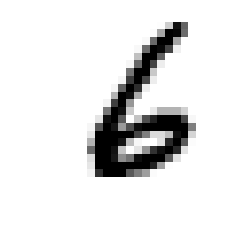

In [5]:
sample = random.choice(mnist.train.images)
show_digit(sample)

In [6]:
print(u"Eğitim veriseti : %d " %len(mnist.train.images))
print(u"Test veriseti : %d" %len(mnist.test.images))

Eğitim veriseti : 55000 
Test veriseti : 10000


Değişkenlerin tanımlanması
Girişlerin kaç tane olduğu X
Çıkışların kaçtane olduğu y placholder(yer tutucu)lara atandı.

W ve b değerlerimizi tanımladık.

In [0]:
X= tf.placeholder(tf.float32,[None,784]) # Yer tutucu. 28x28 den 784
y= tf.placeholder(tf.float32,[None,10])

W=tf.Variable(tf.truncated_normal(shape=[784,10],stddev=0.1)) #Ağırlık matrisi,rasgele sayılar oluştur # Stddev rasgele ağırlıklar arasında maximum olacak aralık
b=tf.Variable(tf.constant(shape=[10], value=0.1)) # Bias tanımlaması.0.1

Optimizer : Bir araç tensorflow kütüphanesinin bir özelliği. GradientDescentOptimize öğrenme katsayısı. Her çalıştığında loss'u hesaplayıp küçültecek(minimize) edecek.

In [0]:
y_pred=tf.nn.softmax(tf.matmul(X,W) + b) # Softmax

loss=tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred),reduction_indices=[1]))

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

correct_predictions=tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))

accuracy=tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

Range komutu ile 10000'e kadar devam ediyor.
İçerisinde bulunan if komutu ile de her 300 de 1 test doğruluğunu ekrana yansıtıyorum.


In [9]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
  xs ,ys = mnist.train.next_batch(128) # Tek seferde 128 resim gönder.
  sess.run(optimizer ,feed_dict={X: xs, y: ys})
  
  if i % 300 == 0: # 300 de bir bana durumu göster.
    acc=sess.run(accuracy, feed_dict={X: mnist.test.images,
                                     y: mnist.test.labels})
    
    print("[*] Step : %d , test accuracy : %.2f%%" % (i,acc* 100))

[*] Step : 0 , test accuracy : 36.13%
[*] Step : 300 , test accuracy : 90.81%
[*] Step : 600 , test accuracy : 91.31%
[*] Step : 900 , test accuracy : 91.71%
[*] Step : 1200 , test accuracy : 91.93%
[*] Step : 1500 , test accuracy : 91.94%
[*] Step : 1800 , test accuracy : 91.94%
[*] Step : 2100 , test accuracy : 92.18%
[*] Step : 2400 , test accuracy : 92.05%
[*] Step : 2700 , test accuracy : 92.04%
[*] Step : 3000 , test accuracy : 92.34%
[*] Step : 3300 , test accuracy : 91.89%
[*] Step : 3600 , test accuracy : 92.34%
[*] Step : 3900 , test accuracy : 92.08%
[*] Step : 4200 , test accuracy : 91.94%
[*] Step : 4500 , test accuracy : 92.05%
[*] Step : 4800 , test accuracy : 92.33%
[*] Step : 5100 , test accuracy : 92.07%
[*] Step : 5400 , test accuracy : 92.22%
[*] Step : 5700 , test accuracy : 92.32%
[*] Step : 6000 , test accuracy : 92.52%
[*] Step : 6300 , test accuracy : 92.18%
[*] Step : 6600 , test accuracy : 92.32%
[*] Step : 6900 , test accuracy : 92.43%
[*] Step : 7200 , test

Resmin 0 olma ihtimali :99.69%
Resmin 1 olma ihtimali :0.00%
Resmin 2 olma ihtimali :0.00%
Resmin 3 olma ihtimali :0.00%
Resmin 4 olma ihtimali :0.00%
Resmin 5 olma ihtimali :0.29%
Resmin 6 olma ihtimali :0.02%
Resmin 7 olma ihtimali :0.00%
Resmin 8 olma ihtimali :0.00%
Resmin 9 olma ihtimali :0.00%


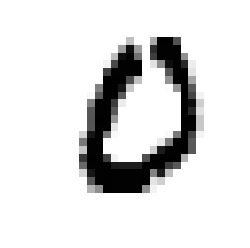

In [10]:
sample = random.choice(mnist.test.images)

predictions = sess.run(y_pred, feed_dict={X: [sample] })[0]

for i, v in enumerate(predictions):
  print(u"Resmin %d olma ihtimali :%.2f%%" % (i,v*100))
  
show_digit(sample)  

Resmin 0 olma ihtimali :0.00%
Resmin 1 olma ihtimali :0.00%
Resmin 2 olma ihtimali :37.09%
Resmin 3 olma ihtimali :27.98%
Resmin 4 olma ihtimali :0.00%
Resmin 5 olma ihtimali :34.80%
Resmin 6 olma ihtimali :0.00%
Resmin 7 olma ihtimali :0.00%
Resmin 8 olma ihtimali :0.13%
Resmin 9 olma ihtimali :0.00%


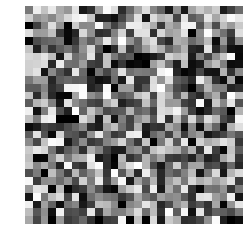

In [11]:
random_img = np.random.rand(784)

predictions = sess.run(y_pred, feed_dict={X: [random_img] })[0]

for i, v in enumerate(predictions):
  print(u"Resmin %d olma ihtimali :%.2f%%" % (i,v*100))
  
show_digit(random_img)